In [ ]:
#Raques McGill
#Code retrieved from Python for Finance Cookbook by Eryk Lewinson

[*********************100%***********************]  1 of 1 completed
                        Zero Mean - ARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:               -1600.40
Distribution:                  Normal   AIC:                           3204.80
Method:            Maximum Likelihood   BIC:                           3214.05
                                        No. Observations:                  754
Date:                Sun, Oct 11 2020   Df Residuals:                      752
Time:                        22:43:17   Df Model:                            2
                            Volatility Model                            
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
o

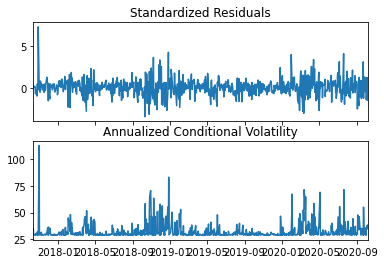

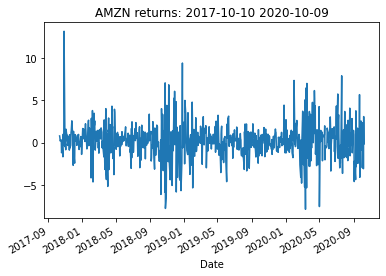

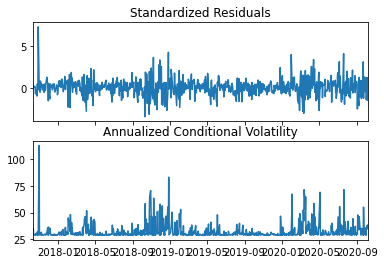

In [2]:

## Explaining stock returns' volatility with ARCH models

# 1. Import the libraries:
import pandas as pd #Used for Data Science processes to make indexing easy
import yfinance as yf #Provides historical stock data from Yahoo Finance
from arch import arch_model #Autoregressive Conditional Heteroskedasticity (ARCH) \ 
    # and other tools for financial econometrics
import numpy as np #Provides fast mathematical function processing

# 2. Specify the risky asset and the time horizon:
RISKY_ASSET = 'AMZN' 
START_DATE = '2017-10-10' 
END_DATE = '2020-10-09'

# 3. Download data from Yahoo Finance:
df = yf.download(RISKY_ASSET, start=START_DATE, end=END_DATE, adjusted=True)

# 4. Calculate daily returns:
returns = 100 * df['Adj Close'].pct_change().dropna() 
returns.name = 'asset_returns'
returns.plot(title=f'{RISKY_ASSET} returns: {START_DATE} {END_DATE}')
# Running the code generates the following plot:
    
# 5. Specify the ARCH model:
model = arch_model(returns, mean='Zero', vol='ARCH', p=1, o=0, q=0) 

# 6. Estimate the model and print the summary:
model_fitted = model.fit(disp='off') 
print(model_fitted.summary())
# Running the code results in the following summary:
    
# 7. Plot the residuals and the conditional volatility: 
model_fitted.plot(annualize='D') 

# Running the code results in the plots shown below: 

    

                       Zero Mean - GARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1558.66
Distribution:                  Normal   AIC:                           3123.32
Method:            Maximum Likelihood   BIC:                           3137.20
                                        No. Observations:                  754
Date:                Sun, Oct 11 2020   Df Residuals:                      751
Time:                        22:43:27   Df Model:                            3
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1177  8.468e-02      1.390      0.165 [-4.82

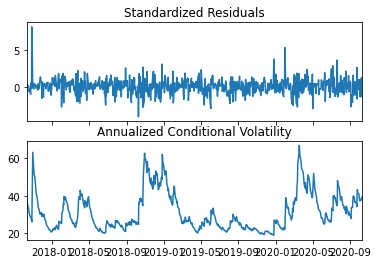

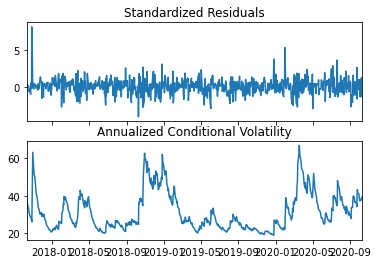

In [3]:
## Explaining stock returns' volatility with GARCH models 

# 1. Specify the GARCH model:
model = arch_model(returns, mean='Zero', vol='GARCH', p=1, o=0, q=1)
# 2. Estimate the model and print the summary:
model_fitted = model.fit(disp='off') 
print(model_fitted.summary()) 

# This results in the following screenshot: 

# 3. Plot the residuals and the conditional volatility: 
model_fitted.plot(annualize='D')



  

[*********************100%***********************]  4 of 4 completed


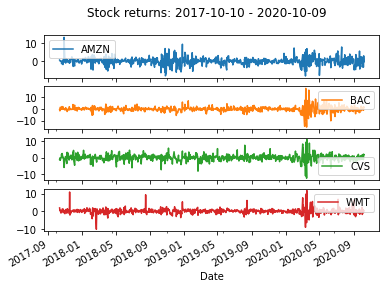

In [5]:
## Implementing a CCC-GARCH model for multivariate volatility forecasting
# 1. Import the libraries:
import pandas as pd #Used for Data Science processes to make indexing easy
import yfinance as yf #Provides historical stock data from Yahoo Finance
from arch import arch_model #Autoregressive Conditional Heteroskedasticity (ARCH) \ 
    # and other tools for financial econometrics

# 2. Specify the risky assets and the time horizon:
RISKY_ASSETS = ['AMZN', 'WMT', 'BAC', 'CVS'] 
N = len(RISKY_ASSETS) 
START_DATE = '2017-10-10' 
END_DATE = '2020-10-09'

# 3. Download data from Yahoo Finance:
df = yf.download(RISKY_ASSETS, start=START_DATE, end=END_DATE, adjusted=True)

# 4. Calculate daily returns:
returns = 100 * df['Adj Close'].pct_change().dropna() 
returns.plot(subplots=True,
title=f'Stock returns: {START_DATE} - {END_DATE}');

# 5. Define lists for storing objects:
coeffs = [] 
cond_vol = [] 
std_resids = [] 
models = []

# 6. Estimate the univariate GARCH models: 
for asset in returns.columns:
    model = arch_model(returns[asset], mean='Constant', vol='GARCH', p=1, o=0,
                   q=1).fit(update_freq=0, disp='off') 
    coeffs.append(model.params)
    cond_vol.append(model.conditional_volatility) 
    std_resids.append(model.resid / model.conditional_volatility) 
    models.append(model) 

# 7. Store the results in DataFrames:
coeffs_df = pd.DataFrame(coeffs, index=returns.columns) 
cond_vol_df = pd.DataFrame(cond_vol).transpose() \
.set_axis(returns.columns, axis='columns', inplace=False)
std_resids_df = pd.DataFrame(std_resids).transpose() \
.set_axis(returns.columns, axis='columns', inplace=False)

# 8. Calculate the constant conditional correlation matrix (R): 
R = std_resids_df.transpose().dot(std_resids_df).div(len(std_resids_df))

# 9. Calculate the one-step-ahead forecast of the conditional covariance matrix: 
diag = []
D = np.zeros((N, N)) 
for model in models:
    diag.append(model.forecast(horizon=1).variance.values[-1][0]) 
diag = np.sqrt(np.array(diag)) 
np.fill_diagonal(D, diag)
H = np.matmul(np.matmul(D, R.values), D)
# The end result is:


Retrieved from Python for Finance Cookbook by Eryk Lewinson
Modeling Volatility with GARCH Class Models
Conditional heteroskedasticity refers to a phenomenon caused when an increase in volatility is correlated with a further increase in volatility. Volatility synonymous with risk and has many applications in finance. Firstly, it is used in options pricing. Secondly, volatility has a significant impact on risk management. Thirdly, volatility can be directly traded. 
Explaining stock returns' volatility with ARCH models
The Autoregressive Conditional Heteroskedasticity (ARCH) model explicitly recognizes the difference between the unconditional and the conditional variance of the time series. It models the conditional variance as a function of past residuals (errors) from a mean process. It assumes the unconditional variance to be constant over time. We must specify the number of prior residuals (q) in the model. ARCH models should only be applied to residuals obtained after fitting another model to the given time series. The residuals should look like observations of a discrete white noise—zero mean, stationary (no trends or seasonal effects, that is, no evident serial correlation).
In Step 2 to 4, we downloaded Amazon's daily stock prices and calculated simple returns. When working with (G)ARCH models, convergence warnings are likely to occur in the case of very small numbers. This is caused by instabilities in the underlying scipy's optimization algorithms. To overcome this issue, we multiplied the returns by 100 to express them as percentages. In Step 5, we defined the ARCH(1) model. For the mean model, we selected the zero-mean approach, which is suitable for many liquid financial assets. Another viable choice here could be a constant mean. In Step 6, we fitted the model, using the fit method. Additionally, we passed disp='off' to the fit method to suppress output from the optimization steps. To fit the model using the arch library, we had to take similar steps to the familiar scikitlearn approach: we first defined the model and then fitted it to the data. We printed the model's summary by using the summary method. In Step 7, we also inspected the standardized residuals and the conditional volatility series by plotting them. The standardized residuals were computed by dividing the residuals by the conditional volatility. By passing annualize='D' to the plot method, we indicated that we wanted to annualize the conditional volatility series from daily data.
Explaining stock returns' volatility with GARCH models
Generalized Autoregressive Conditional Heteroskedasticity (GARCH) can be considered an ARMA model applied to the variance of a time series—the AR component was already expressed in the ARCH model, while GARCH additionally adds the moving average part. In other words, the ARCH model specifies the conditional variance as a linear function of past sample variances, while the GARCH model adds lagged conditional variances to the specification.
When using ARCH, the conditional volatility series exhibits many spikes, and then immediately returns to the low level. In the case of GARCH, as the model also includes lagged conditional volatility, it takes more time to return to the level observed before the spike.
Implementing a CCC-GARCH model for multivariate volatility forecasting
Now, we move from univariate conditional volatility models to the multivariate setting have already considered multiple. As a starting point, we consider Bollerslev's Constant Conditional Correlation GARCH (CCC-GARCH) model. The model consists of N univariate GARCH models, related to each other via a constant conditional correlation matrix R. It avoids the problem of guaranteeing positive definiteness of t into variances and correlations by splitting it. The conditional correlations between error terms are constant over time. Individual conditional variances follow a univariate GARCH(1,1) model.
In Steps 2 and Step 3, we downloaded the daily stock prices of Amazon, Bank of America, CVS Health, and Walmart. Then, we calculated simple returns and multiplied them by 100 to avoid encountering convergence errors. In Step 5, we defined empty lists for storing elements required at later stages: GARCH coefficients, conditional volatilities, standardized residuals, and the models themselves (used for forecasting). In Step 6, we iterated over the columns of the DataFrame containing the stock returns and fitted a univariate GARCH model to each of the series. We stored the results in the predefined lists. Then, we wrangled the data in order to have objects such as residuals in DataFrames, to make work with them and visual inspection easier. In Step 8, we calculated the constant conditional correlation matrix (R) as the unconditional correlation matrix of zt where zt stands for time t standardized residuals from the univariate GARCH models. In the last step, we obtained one-step-ahead forecasts of the conditional covariance matrix Ht+1. To do so, we did the following: We created a matrix Dt+1 of zeros, using np.zeros. We stored the one-step-ahead forecasts of conditional variances from univariate GARCH models in a list called diag. Using np.fill_diagonal, we placed the elements of the list called diag on the diagonal of the matrix Dt+1.
